# King County Housing Price Prediction

## Overview
This project will utilize multiple regression analysis to predict housing prices in King County, WA. The training data will be explored for feature building and the final model will be built and trained by SciKit python library. The data and project scope was provide by Flatiron School for Data Science Immersive program phase 2 final project. 

## Business Problem
A Seattle real estate company seeks to increase porfolio in King County, WA and wants to accurately predict the sales price of a property. Having an accurate sales prediction will aid in strategizing the investment options to maximize their profit. A multiple linaer regression model will be built base on provided property data for this task. 

During the exploratory phase following questions will also be focused on:
1. What location in the county has the highest property value?
2. What aspects of the property brings value?
3. Do renovations have effect on property value?

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Library and Data Import

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
kc_df = pd.read_csv("data/kc_house_data_train.csv", index_col=0)

## Exploratory Data Analysis

This section will seek to answer the questions listed in business problems. The data will be visualized for easy understanding and followed with appropriate statistical analysis for empirical findings within data. Following are the summaries of the questions answered in this section:

1. What neighborhood contains most valuable properties?
2. Does having a basement increase the property value?
3. Does renovation increase the property value?
    - Are more recent renovation more valuable?
4. Does condition of the property affect the value?
    - Are the property age and condition related?

### Data Integrity and Description

First, the data will be checked for completeness and integrity. This will also provide an opportunity to quickly overview the data set and prepare the future steps. 

In [ ]:
pd.DatetimeIndex(dataframe['date']).month
dataframe['sale_year'] = pd.DatetimeIndex(dataframe['date']).year


In [17]:
kc_df.shape

(17290, 21)

In [14]:
kc_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data is free of null values and will not require further data cleaning. 

#### Column Description
- **id** - unique ID for a house
- **date** - Date day house was sold
- **price** - Price is prediction target
- **bedrooms** - Number of bedrooms
- **bathrooms** - Number of bathrooms
- **sqft_living** - square footage of the home
- **sqft_lot** - square footage of the lot
- **floors** - Total floors (levels) in house
- **waterfront** - Whether house has a view to a waterfront
- **view** - Number of times house has been viewed
- **condition** - How good the condition is (overall)
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house (apart from basement)
- **sqft_basement** - square footage of the basement
- **yr_built** - Year when house was built
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip code in which house is located
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Given that many columns contain categorical values that are not pertinent to basic statistical analysis, only few will be chosen for brief overlook of the data.

In [27]:
summary_features = ["price", "yr_built", "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
                    "floors", "condition", "grade", "sqft_living15", "sqft_lot15"]

In [28]:
kc_df[summary_features].describe()

,price,yr_built,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,1970.792019,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,3.408502,7.654425,1987.986698,12873.475824
std,3.733190e+05,29.343516,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.651296,1.174718,684.802635,27227.437583
min,7.500000e+04,1900.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,1.000000,1.000000,399.000000,659.000000
25%,3.210000e+05,1951.000000,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,3.000000,7.000000,1490.000000,5111.250000
50%,4.500000e+05,1974.000000,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,3.000000,7.000000,1840.000000,7622.500000
75%,6.450000e+05,1996.000000,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,4.000000,8.000000,2360.000000,10101.750000
max,7.700000e+06,2015.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,6210.000000,858132.000000


#### Column Analysis (summary_features)
- **price** - Price has a large gap of 2 magnitude. Further analysis will be required especially against the sale date. 
- **yr_built** - The data set contains builds built from 1900 to 2015.
- **bedrooms** - 0 bedrooms indicate studio apartment, most homes contain 4 or less bedrooms with some extreme outliers.
- **bathrooms** - Surprising to find that there are homes with 0 bathrooms. Most seem to have at least a 3/4 bathroom. 
- **sqft_living** - Living area also varies greatly from a small apartments to mansions. 
- **sqft_lot** - Similar to sqft_living above.
- **floors** - There are half floors to account for, which are top levels that do not spand the entirity of the house. 
- **condition** - Average properties sold are sold at 3.4 (may require superficial repair).
- **grade** - Average grade given in King County is 7, which means average properties are sold in slightly above average grade. 
- **sqft_living15** - The neighboring properties tend to be similar in sizes (similar trend to sqft_lving)
- **sqft_lot15** - Similar to sqft_living15 above

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

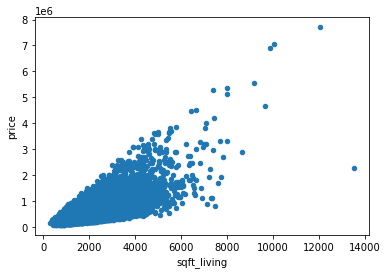

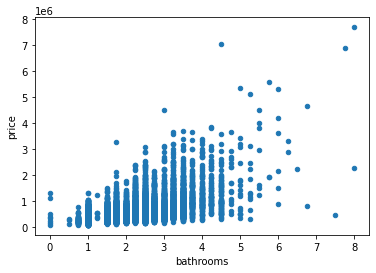

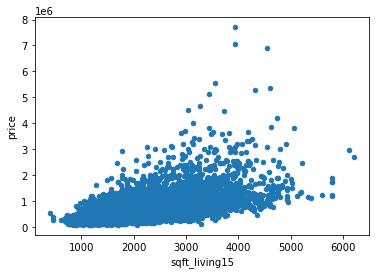

In [118]:
kc_df.plot(kind="scatter", x="sqft_living", y="price")
kc_df.plot(kind="scatter", x="bathrooms", y="price")
kc_df.plot(kind="scatter", x="sqft_living15", y="price")

### Property Value by Zipcode

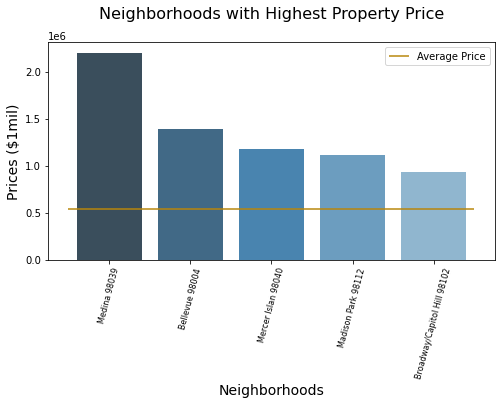

In [190]:
#property values by zipcode calculation
kc_top5_price = kc_df.groupby("zipcode")["price"].mean().sort_values(ascending = False)[:5]
kc_mean_price = kc_df.price.mean()
#top5 neighborhood label for plot
area_labels = ["Medina 98039", "Bellevue 98004", "Mercer Islan 98040", 
               "Madison Park 98112", "Broadway/Capitol Hill 98102"]

#plotting the data
plt.subplots(figsize=(8,4))
sns.barplot(x=kc_top5_price.index, y=kc_top5_price, order=kc_top5_price.index, palette="Blues_d") #blue for seahawks!
plt.xticks(np.arange(5), area_labels, rotation=75, size=8) #relabel x with list above
plt.hlines(kc_mean_price, -.5 ,4.5, colors="darkgoldenrod", label="Average Price") #plot average price horizontal line

#prettify graph
plt.xlabel("Neighborhoods", size=14)
plt.ylabel("Prices ($1mil)", size=14)
plt.title("Neighborhoods with Highest Property Price", size=16, y=1.08)
plt.legend() #show legend

#uncomment line below to export image
plt.savefig("images/high_price_neighborhood.png",bbox_inches = "tight")
plt.show();

The neighborhood around Lake Washington have highest sales price within the dataset. The average property price within these neighborhood doubles the overall average property cost of King County with Medina's average property value being over quadruple of King County average. Also, the clear access to the lake/marina and large parks within the neighborhood seems to drive the prices of these neighborhood. 

### Does basement add value to the house?

Does a house having a basement add value to the house?

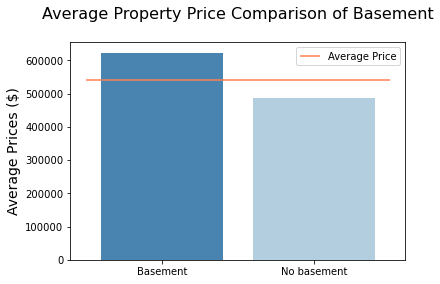

In [193]:
#mean values to plot
basement = kc_df[(kc_df["sqft_basement"] > 0)].price.mean()
no_basement = kc_df[(kc_df["sqft_basement"] == 0)].price.mean()

#prepare plot data
label = ["Basement", "No basement"]
values = [basement, no_basement]

sns.barplot(x=label, y=values, palette="Blues_r")
plt.hlines(kc_mean_price, -.5 ,1.5, colors="coral", label="Average Price") #plot average price horizontal line

#prettify graph
plt.ylabel("Average Prices ($)", size=14)
plt.title("Average Property Price Comparison of Basement", size=16, y=1.08)

#uncomment line below to export image
plt.savefig("images/basement_value.png",bbox_inches = "tight")
plt.legend()
plt.show();

### Correlation Check for Feature Selection

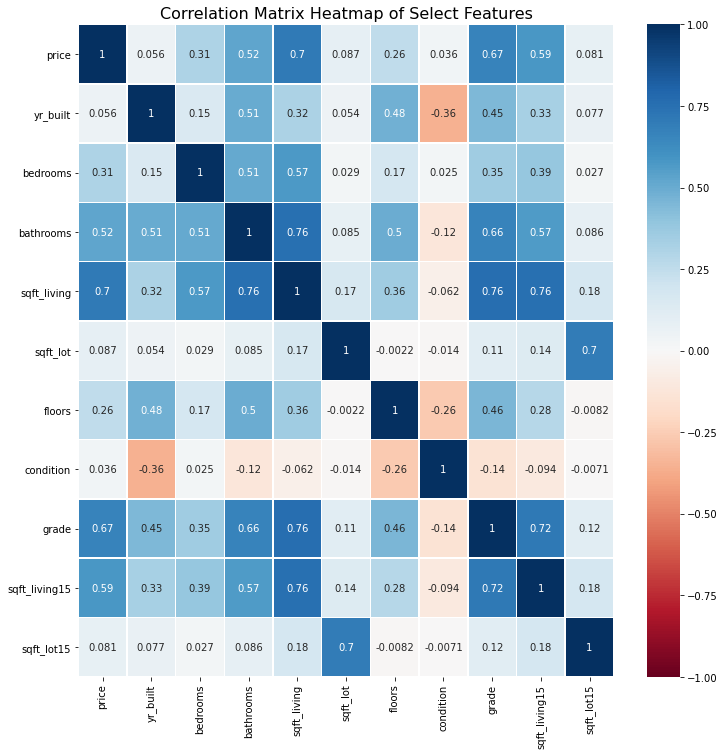

In [37]:
plt.subplots(figsize=(12,12))
sns.heatmap(kc_df[summary_features].corr(), annot=True, linewidths=.5, cmap="RdBu", vmin = -1, vmax=1)
plt.title("Correlation Matrix Heatmap of Select Features", size=16);

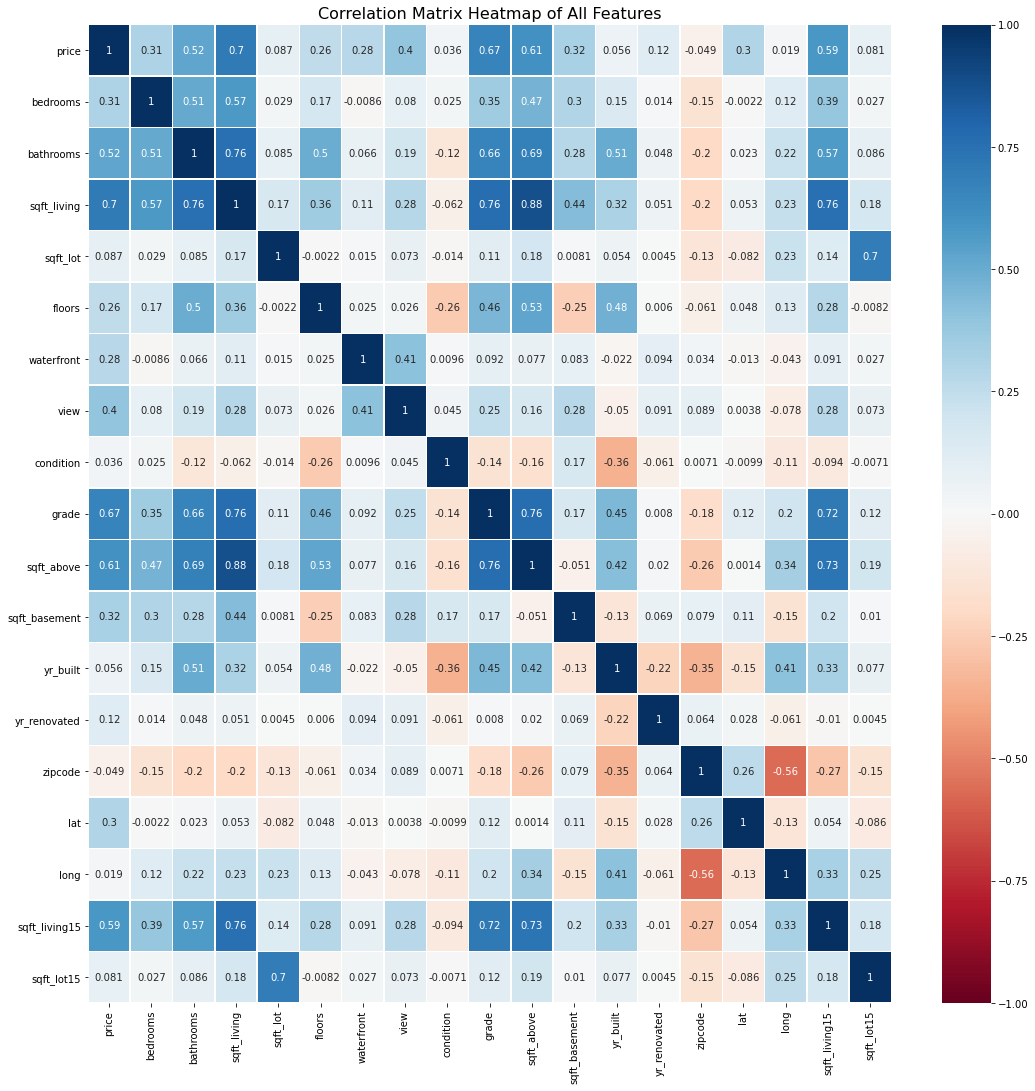

In [161]:
plt.subplots(figsize=(18,18))
sns.heatmap(kc_df.iloc[:,1:].corr(), annot=True, linewidths=.5, cmap="RdBu", vmin = -1, vmax=1)
plt.title("Correlation Matrix Heatmap of All Features", size=16);

### Preliminary Mulitple Linear Regression
Using the correlation matrix heatmap above it can be seen that `sqft_living`, `grade`, and `sqft_lving15` have highest correlation to the price. However, given that they are also highly correlated with `sqft_lving` only `sqft_lving` used among them. Also, `bedrooms` and `floors` also have slight positive correlation to the price and do not have high correlation (0.7 or above) between them or `sqft_living`. Therefore, a simple multiple linear regression will be made using `statsmodel` to set a baseline for future linear regression model. 

In [38]:
pre_mlr = smf.ols(formula="price~sqft_living+C(bedrooms)+C(floors)", data=kc_df).fit()
pre_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1072.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:49:16   Log-Likelihood:            -2.3988e+05
No. Observations:               17290   AIC:                         4.798e+05
Df Residuals:                   17271   BIC:                         4.799e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.807e+05   7.47e+04     -2.418      0.016   -3.27e+05   -3.42e+04
C(bedrooms)[T.1]    1.96e+05   7.73e+04      2.534      0.011    4.44e+04    3.48e+05
C(bedrooms)[T.2]   1.607e+05   7.48e+04      2.149      0.032    1.41e+04    3.07e+05
C(bedrooms)[T.3]    4.25e+04   7.46e+04      0.569      0.569   -1.04e+05    1.89e+05
C(bedrooms)[T.4]  -2.663e+04   7.47e+04     -0.356      0.721   -1.73e+05     1.2e+05
C(bedrooms)[T.5]  -4.602e+04    7.5e+04     -0.613      0.540   -1.93e+05    1.01e+05
C(bedrooms)[T.6]  -7.605e+04   7.66e+04     -0.992      0.321   -2.26e+05    7.42e+04
C(bedrooms)[T.7]  -2.058e+05   8.84e+04     -2.329      0.020   -3.79e+05   -3.26e+04
C(bedrooms)[T.8]   8.393e+04    1.1e+05      0.762      0.446   -1.32e+05       3e+05
C(bedrooms)[T.9]  -3.329e+05   1.37e+05     -2.425      0.015   -6.02e+05   -6.38e+04
C(bedrooms)[T.10] -2.133e+05   1.66e+05     -1.285      0.199   -5.39e+05    1.12e+05
C(bedrooms)[T.11] -2.644e+05   2.67e+05     -0.989      0.323   -7.88e+05     2.6e+05
C(bedrooms)[T.33]  2.798e+05   2.67e+05      1.046      0.295   -2.44e+05    8.04e+05
C(floors)[T.1.5]   8.058e+04   7179.273     11.224      0.000    6.65e+04    9.46e+04
C(floors)[T.2.0]  -3.664e+04   4687.267     -7.816      0.000   -4.58e+04   -2.74e+04
C(floors)[T.2.5]   2.087e+05   2.22e+04      9.383      0.000    1.65e+05    2.52e+05
C(floors)[T.3.0]   1.116e+05   1.21e+04      9.195      0.000    8.78e+04    1.35e+05
C(floors)[T.3.5]   2.169e+05   9.84e+04      2.204      0.028     2.4e+04     4.1e+05
sqft_living         333.9119      2.870    116.352      0.000     328.287     339.537
==============================================================================
Omnibus:                    11552.067   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           411396.018
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      26.269   Cond. No.                     3.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model performs decently for a simple model with adjusted R-squred value of 0.527. Future model will use this as the baseline for its performance comparison. Also indicated by summary messages there are some multicolinearity concerns with this model and this is also indicated between sqft_living and bedroom's correlation value of 0.57 from the correlation matrix heatmap. Some bedroom categories also contain p-values higher than typcial alpha (a=0.05), so this feature will be explored further feature engineering to improve the model performance. 

## Feature Engineering

### Renovation

In [7]:
kc_df.yr_renovated.unique()

array([   0, 1998, 1983, 1989, 1985, 2002, 1999, 2010, 2015, 1990, 1972,
       2013, 1955, 2001, 2000, 2011, 1956, 2006, 1965, 1987, 2007, 1995,
       2014, 1945, 1993, 1992, 1979, 1980, 1946, 1988, 1958, 1996, 2004,
       1973, 2005, 1994, 2003, 1986, 1981, 1953, 2012, 1991, 1975, 1977,
       1978, 1968, 2009, 1984, 2008, 1967, 1997, 1974, 1982, 1963, 1969,
       1940, 1970, 1971, 1957, 1976, 1960, 1962, 1944, 1959, 1964, 1950,
       1934, 1951, 1948], dtype=int64)

In [8]:
kc_df["renovated"] = kc_df.yr_renovated.apply(lambda x: 1 if x > 0 else 0)

In [9]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0


In [62]:
import geopandas

In [66]:
import folium

In [11]:
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [52]:
top_features = kc_df.corr()["price"].sort_values(ascending = False).index[:15]

<AxesSubplot:>

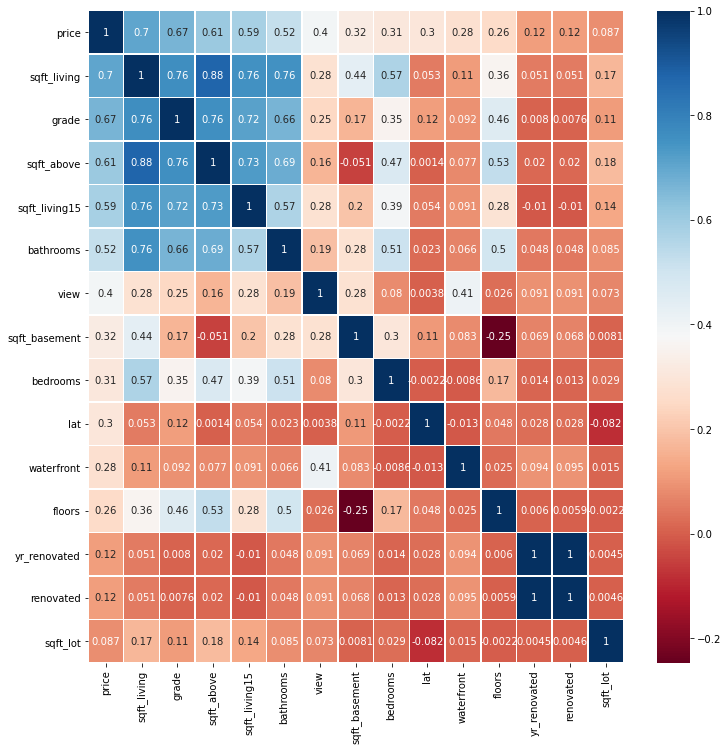

In [54]:
plt.subplots(figsize=(12,12))
sns.heatmap(kc_df[top_features].corr(), annot=True, linewidths=.5, cmap="RdBu")

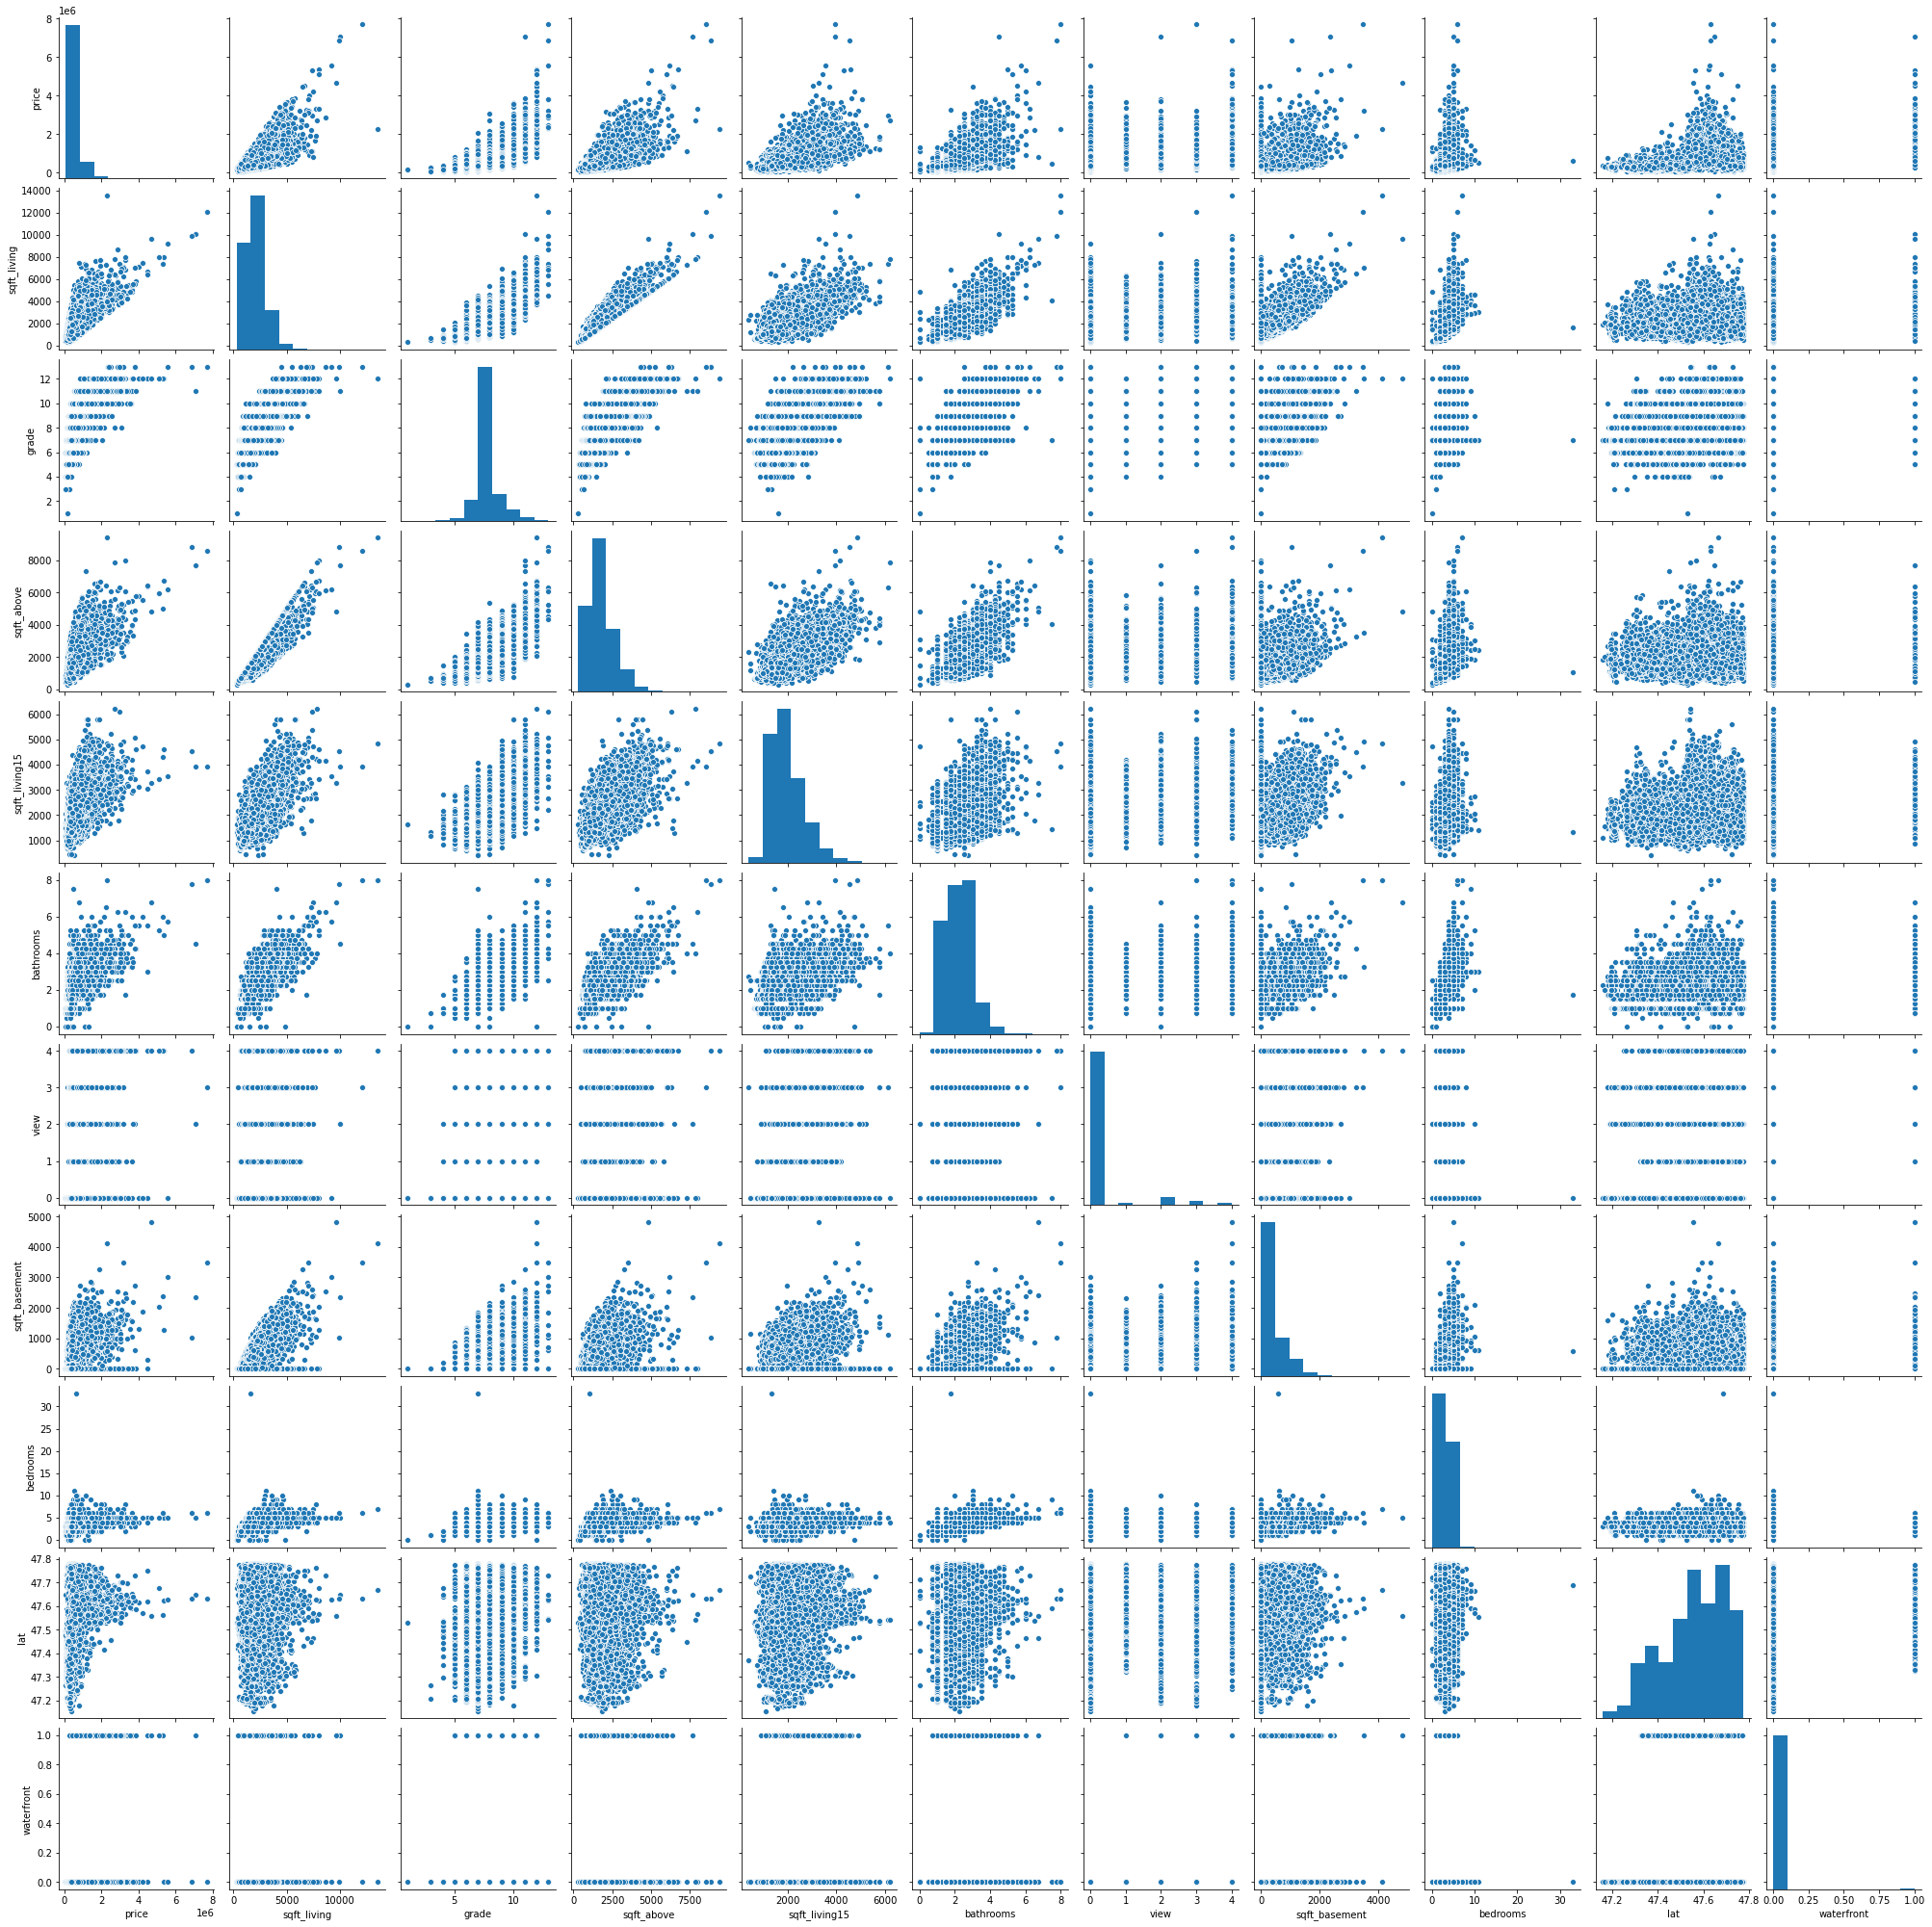

In [42]:
sns.pairplot(kc_df[top_features])

## Linear Regression

In [45]:
check1 = smf.ols(formula="price~sqft_living+sqft_basement+sqft_lot+C(renovated)", data=kc_df).fit()
check1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4368.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:36:40   Log-Likelihood:            -2.4033e+05
No. Observations:               17290   AIC:                         4.807e+05
Df Residuals:                   17285   BIC:                         4.807e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -5.48e+04   5011.690    -10.935      0.000   -6.46e+04    -4.5e+04
C(renovated)[T.1]  1.505e+05      1e+04     15.038      0.000    1.31e+05     1.7e+05
sqft_living         283.3923      2.459    115.232      0.000     278.572     288.213
sqft_basement        11.6771      5.040      2.317      0.021       1.799      21.555
sqft_lot             -0.2663      0.048     -5.533      0.000      -0.361      -0.172
==============================================================================
Omnibus:                    12231.430   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           489698.152
Skew:                           2.926   Prob(JB):                         0.00
Kurtosis:                      28.407   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
check1 = smf.ols(formula="price~sqft_living+sqft_basement+lat+waterfront+C(view)+C(renovated)+", data=kc_df).fit()
check1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5431.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:            -2.3820e+05
No. Observations:               17290   AIC:                         4.764e+05
Df Residuals:                   17284   BIC:                         4.765e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.468e+07   6.12e+05    -56.657      0.000   -3.59e+07   -3.35e+07
C(renovated)[T.1]  1.074e+05   8888.997     12.086      0.000       9e+04    1.25e+05
sqft_living         272.9249      2.146    127.187      0.000     268.719     277.131
sqft_basement       -16.1957      4.467     -3.625      0.000     -24.952      -7.439
lat                7.286e+05   1.29e+04     56.588      0.000    7.03e+05    7.54e+05
waterfront         8.462e+05   2.01e+04     42.056      0.000    8.07e+05    8.86e+05
==============================================================================
Omnibus:                    13356.779   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           795447.329
Skew:                           3.212   Prob(JB):                         0.00
Kurtosis:                      35.602   Cond. No.                     7.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis